### **Assignment: Association Rule Mining Using the Groceries Dataset**

#### **Objective**:
In this assignment, you will apply association rule mining techniques to the **Groceries dataset** to discover relationships between products bought together. Using the Apriori algorithm, you will compute frequent itemsets and extract association rules based on **support** and **confidence** metrics.


### **Dataset**:
The dataset can be accessed via the following link:

[Groceries Dataset CSV](https://raw.githubusercontent.com/9meo/bas240/refs/heads/main/LAB8/Groceries_dataset.csv)

The dataset contains transactional data of groceries purchased by customers. Each transaction lists the products purchased by a customer.

In [9]:
!pip install mlxtend

### **Assignment Tasks**:

#### **Step 1: Load the Dataset**

Download and load the **Groceries dataset** into a Pandas DataFrame:

- The dataset contains two main columns:
  - **Member_number**: Identifies each unique customer.
  - **itemDescription**: Describes the products purchased in each transaction.


In [10]:
# CODE GOES HERE
import pandas as pd

!wget https://raw.githubusercontent.com/9meo/bas240/refs/heads/main/LAB8/Groceries_dataset.csv

df = pd.read_csv('Groceries_dataset.csv')
df.head()



--2025-03-04 23:36:53--  https://raw.githubusercontent.com/9meo/bas240/refs/heads/main/LAB8/Groceries_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1103280 (1.1M) [text/plain]
Saving to: ‘Groceries_dataset.csv.2’

Groceries_dataset.c 100%[===================>]   1.05M  --.-KB/s    in 0.06s   

2025-03-04 23:36:53 (17.3 MB/s) - ‘Groceries_dataset.csv.2’ saved [1103280/1103280]



,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk



#### **Step 2: Data Preprocessing**

Before applying the Apriori algorithm, we need to transform the dataset into the right format. The data needs to be represented as **one-hot encoded** transactions, where each column represents a product, and each row represents a transaction (1 if the product was purchased, 0 if not).

Steps:
- Group products by transaction (i.e., `Member_number`).
- Convert the data into a **basket format** (one-hot encoded) where rows represent transactions, and columns represent products.
- Group products by transaction (i.e., `Member_number`) and convert it into a **basket format** where rows represent transactions and columns represent products.

In [11]:
#CODE GOES HERE

from mlxtend.preprocessing import TransactionEncoder


#group products by transaction
transactions = df.groupby('Member_number')['itemDescription'].apply(list).values.tolist()

#hot encode transactions
te = TransactionEncoder() # turn into transaction data
te_ary = te.fit(transactions).transform(transactions) #we fit and transform the dataset
basket_df = pd.DataFrame(te_ary, columns=te.columns_) #set it back to pandas
basket_df = basket_df.map(lambda x: 1 if x else 0)
basket_df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3896,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


3. **Generate Frequent Itemsets**:
   - For different min_support values of 0.01, 0.02,.... 0.10, 0.2, 0.3, 0.9...count the number of frequent itemset and create a table out of it.
   - Also draw a line graph showing how frequent itemset is lowering
   - Use the **Apriori algorithm** to identify top 200 frequent itemsets. Choose a minimum support threshold and justify your choice.

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in wors

    min_support  frequent_itemset_count
0          0.01                    3016
1          0.02                     894
2          0.03                     415
3          0.04                     248
4          0.05                     165
5          0.06                     116
6          0.07                      83
7          0.08                      65
8          0.09                      51
9          0.10                      42
10         0.20                       9
11         0.30                       4
12         0.90                       0


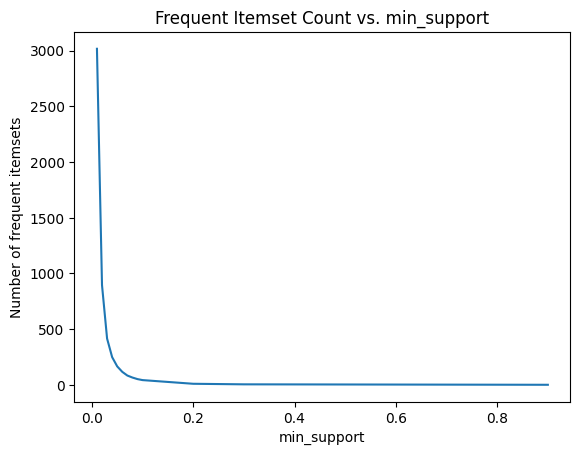

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
85,0.458184,(whole milk)
52,0.376603,(other vegetables)
64,0.349666,(rolls/buns)
73,0.313494,(soda)
86,0.282966,(yogurt)
...,...,...
421,0.044895,"(margarine, rolls/buns)"
500,0.044638,"(root vegetables, pip fruit)"
555,0.044638,"(shopping bags, tropical fruit)"
16,0.044638,(chewing gum)


In [12]:
#CODE GOES HERE
from mlxtend.frequent_patterns import apriori

import matplotlib.pyplot as plt

min_supports = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.2, 0.3, 0.9]
frequent_itemset_counts = []

for min_support in min_supports:
    frequent_itemsets = apriori(basket_df, min_support=min_support, use_colnames=True)
    frequent_itemset_counts.append(len(frequent_itemsets))

# Create a table
table_data = {'min_support': min_supports, 'frequent_itemset_count': frequent_itemset_counts}
table = pd.DataFrame(table_data)
print(table)

# Draw a line graph
plt.plot(min_supports, frequent_itemset_counts)
plt.xlabel('min_support')
plt.ylabel('Number of frequent itemsets')
plt.title('Frequent Itemset Count vs. min_support')
plt.show()

# Use Apriori algorithm to identify top 200 frequent itemsets
# Choosing min_support = 0.02 as a starting point. This value is chosen after visualising the graph between min_support and frequent itemset count. It appears to provide a reasonable tradeoff between capturing enough frequent itemsets and avoiding an excessive number
min_support = 0.02
frequent_itemsets = apriori(basket_df, min_support=min_support, use_colnames=True)

# Sort the frequent itemsets by support and select the top 200
frequent_itemsets = frequent_itemsets.sort_values('support', ascending=False).head(200)
frequent_itemsets

4. **Generate Association Rules**:
   - For different min_thresold values of 0.05, 0.10, 0.15, 0.2,  .... 0.5 count the number of rules and create a table out of it.
   - Also draw a line graph showing how rules  is lowering
   - Generate association rules for top 200 rules based on **confidence**.Choose a minimum confidence threshold and justify your choice.



   min_threshold  rule_count
0           0.05         352
1           0.10         348
2           0.15         300
3           0.20         238
4           0.25         192
5           0.30         162
6           0.35         138
7           0.40          95
8           0.45          56
9           0.50          39


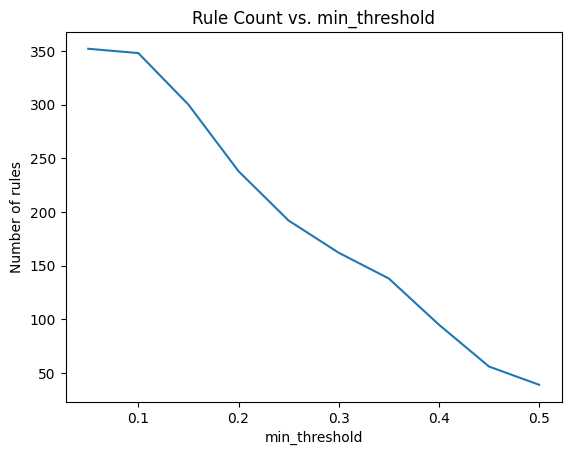

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
97,"(bottled water, other vegetables)",(whole milk),0.093894,0.458184,0.056183,0.598361,1.305941,1.0,0.013162,1.349012,0.258544,0.113295,0.258717,0.360491
53,"(yogurt, other vegetables)",(whole milk),0.120318,0.458184,0.071832,0.597015,1.303003,1.0,0.016704,1.344507,0.264348,0.141772,0.256233,0.376895
157,"(sausage, yogurt)",(whole milk),0.075423,0.458184,0.044895,0.595238,1.299125,1.0,0.010337,1.338605,0.249034,0.091864,0.252954,0.346611
74,"(yogurt, rolls/buns)",(whole milk),0.111339,0.458184,0.065931,0.592166,1.292420,1.0,0.014917,1.328521,0.254605,0.130922,0.247283,0.368031
135,"(sausage, rolls/buns)",(whole milk),0.082350,0.458184,0.048743,0.591900,1.291841,1.0,0.011012,1.327657,0.246184,0.099113,0.246793,0.349142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,(soda),(yogurt),0.313494,0.282966,0.097486,0.310966,1.098952,1.0,0.008778,1.040637,0.131160,0.195373,0.039050,0.327740
72,(bottled water),(yogurt),0.213699,0.282966,0.066444,0.310924,1.098806,1.0,0.005975,1.040574,0.114360,0.154442,0.038992,0.272869
57,(root vegetables),(yogurt),0.230631,0.282966,0.071575,0.310345,1.096758,1.0,0.006314,1.039700,0.114668,0.161927,0.038184,0.281646
141,(whipped/sour cream),(yogurt),0.154695,0.282966,0.047973,0.310116,1.095950,1.0,0.004200,1.039355,0.103571,0.123107,0.037865,0.239827


In [13]:
# CODE GOES HERE

import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import association_rules

min_thresholds = [0.05, 0.10, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
rule_counts = []

for min_threshold in min_thresholds:
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_threshold)
    rule_counts.append(len(rules))

# Create a table
table_data = {'min_threshold': min_thresholds, 'rule_count': rule_counts}
table = pd.DataFrame(table_data)
print(table)

# Draw a line graph
plt.plot(min_thresholds, rule_counts)
plt.xlabel('min_threshold')
plt.ylabel('Number of rules')
plt.title('Rule Count vs. min_threshold')
plt.show()


# Generate association rules for top 200 rules based on confidence
# Choosing min_confidence = 0.3 as it gives a good balance between the number of rules generated and the confidence level.
min_confidence = 0.3
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)
rules = rules.sort_values('confidence', ascending=False).head(200)
rules


5. **Analyze the Results**:
   - Interpret the association rules generated and discuss how these rules can help a grocery store understand customer purchasing patterns.
   - Highlight a few important rules and explain their significance.
   - Find the frequent itemsets with two or more items that have a minimum support of 5%
   - Find the rules with two or more items in antecedent that have a minimum support of 5% and confindence 30%




In [14]:
#CODE GOES HERE

# Display the top 5 rules with highest confidence
print("Top 5 rules with highest confidence:")
print(rules.head(5))


# Example interpretation:
# If a customer buys "whole milk", they are likely to buy "other vegetables" as well.
# This could indicate that these two products are frequently bought together.  The grocery store could strategically place these items closer together in the store to encourage more sales.
#or have bundle deals put together

# Itemsets with two or more items and minimum support of 5%
itemsets_5_support = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) >= 2) & (frequent_itemsets['support'] >= 0.05)]
print("\nItemsets with at least 2 items and minimum support of 5%:")
print(itemsets_5_support)


# Itemsets with two or more items in antecedent, minimum support of 5%, and confidence of 30%
rules_antecedent_2_items = rules[rules['antecedents'].apply(lambda x: len(x) >= 2) & (rules['support'] >= 0.05) & (rules['confidence'] >= 0.3)]
print("\nRules with at least 2 items in antecedent, minimum support of 5%, and confidence of 30%:")
rules_antecedent_2_items

Top 5 rules with highest confidence:
                           antecedents   consequents  antecedent support  \
97   (bottled water, other vegetables)  (whole milk)            0.093894   
53          (yogurt, other vegetables)  (whole milk)            0.120318   
157                  (sausage, yogurt)  (whole milk)            0.075423   
74                (yogurt, rolls/buns)  (whole milk)            0.111339   
135              (sausage, rolls/buns)  (whole milk)            0.082350   

     consequent support   support  confidence      lift  representativity  \
97             0.458184  0.056183    0.598361  1.305941               1.0   
53             0.458184  0.071832    0.597015  1.303003               1.0   
157            0.458184  0.044895    0.595238  1.299125               1.0   
74             0.458184  0.065931    0.592166  1.292420               1.0   
135            0.458184  0.048743    0.591900  1.291841               1.0   

     leverage  conviction  zhangs_metric   

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
97,"(bottled water, other vegetables)",(whole milk),0.093894,0.458184,0.056183,0.598361,1.305941,1.0,0.013162,1.349012,0.258544,0.113295,0.258717,0.360491
53,"(yogurt, other vegetables)",(whole milk),0.120318,0.458184,0.071832,0.597015,1.303003,1.0,0.016704,1.344507,0.264348,0.141772,0.256233,0.376895
74,"(yogurt, rolls/buns)",(whole milk),0.111339,0.458184,0.065931,0.592166,1.292420,1.0,0.014917,1.328521,0.254605,0.130922,0.247283,0.368031
37,"(other vegetables, rolls/buns)",(whole milk),0.146742,0.458184,0.082093,0.559441,1.220996,1.0,0.014859,1.229837,0.212124,0.157017,0.186884,0.369306
106,"(soda, yogurt)",(whole milk),0.097486,0.458184,0.054387,0.557895,1.217622,1.0,0.009720,1.225537,0.198033,0.108495,0.184031,0.338298
61,"(soda, other vegetables)",(whole milk),0.124166,0.458184,0.069266,0.557851,1.217528,1.0,0.012375,1.225416,0.203992,0.135000,0.183951,0.354514
125,"(tropical fruit, other vegetables)",(whole milk),0.091329,0.458184,0.050539,0.553371,1.207749,1.0,0.008693,1.213123,0.189302,0.101285,0.175681,0.331837
78,"(soda, rolls/buns)",(whole milk),0.119805,0.458184,0.065162,0.543897,1.187072,1.0,0.010269,1.187926,0.179041,0.127064,0.158197,0.343057
127,"(sausage, other vegetables)",(whole milk),0.092868,0.458184,0.050282,0.541436,1.181702,1.0,0.007732,1.181551,0.169504,0.100410,0.153655,0.325589
98,"(bottled water, whole milk)",(other vegetables),0.112365,0.376603,0.056183,0.500000,1.327657,1.0,0.013865,1.246793,0.278035,0.129816,0.197942,0.324591




6. **Visualize**
   - Visualize the relationship between support, and confidence using a scatter plot.



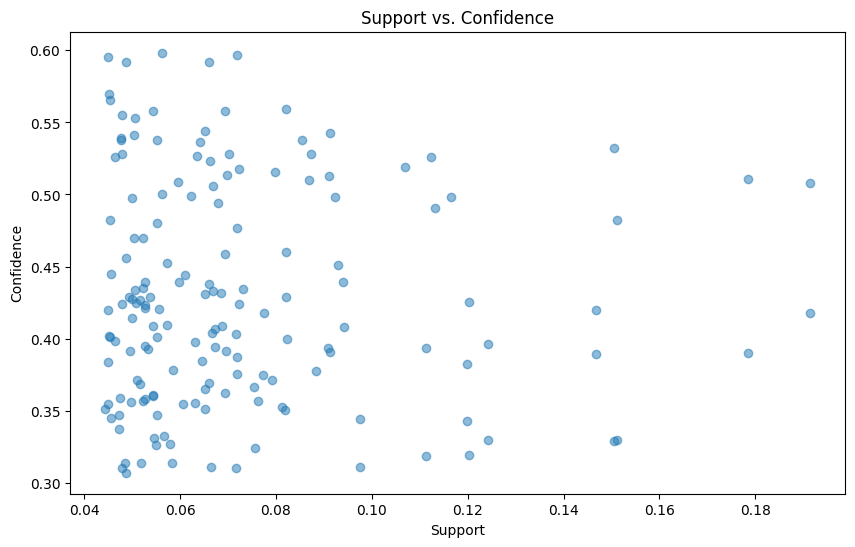

In [15]:
#CODE GOES HERE

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence')
plt.show()
